# EDA: Análisis y preprocesado de datos

Se ha realizado un análisis extensivo de los datos proporcionados para filtrar solo aquellos que son requeridos, además de asegurarse de solo aceptar instancias y atributos que no puedan ocasionar problemas. Con este objetivo en mente, se han realizado una serie de pasos para asegurar el comprobar todos los datos:
- Obtención de los datos en bruto correspondientes
- Análisis de los datos en bruto
- Comprobación de número de datos para buscar *missing values* y columnas constantes
- Visualización de la variable objetivo energía
- Identificación de variables correladas y atributos irrelevantes

Todos estas secciones se han acompañado de gráficos para la visualización de los distintos resultados. 

In [2]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV


SEED = 472182
random.seed(SEED)
np.random.seed(SEED)
pd.set_option('display.max_columns', 500)

## Obtención de la datos en bruto

Para la obtención de los datos en bruto se ha realizado la lectura del fichero csv que contiene los datos que van a ser usados para el entrenamiento del modelo usando la librería pandas. De los datos proporcionados solo interesa utilizar los correspondientes a Sotavento, localización que contiene el identificador 13. Los atributos de esta contienen en su nombre siempre la terminación .13, lo cual se ha usado en una expresión regular para filtrar todos los datos correspondientes a otras localidades. 

Una vez realizado el filtro, se muestra el tamaño del dataset resultante así como un resumen de las características de sus distintas columnas. 


Para la obtención de los datos en bruto vamos a realizar la lectura del csv de los datos de entrenamiento y como dice el enunciado quedarnos con los atributos que se refieren a la zona 13, además de la variable objetivo y de los datos temporales

Tras esto mostraremos un resumen de los datos para analizarlos


In [3]:
data = pd.read_csv("wind_ava.csv")
#Esto quita todas las columnas que no terminan en .13
data = data.filter(regex='.*\.13|energy|datetime')
print("El tamaño del data set es:" ,data.shape)
data.describe(include='all')

El tamaño del data set es: (4748, 24)


,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,u10.13,v10.13,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
count,4748,4748.000000,4.748000e+03,4748.000000,4748.000000,4.748000e+03,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
unique,4748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2005-01-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,693.126247,2.489477e+06,16.008810,31.166541,1.706692e+06,2.815222,2.576284,0.386215,0.120528,97820.301287,286.666391,0.303070,0.167105,285.689253,286.663838,286.665988,0.074229,0.049971,286.668152,0.413677,-5.908467,0.447175,0.328204
std,NaN,665.531609,4.482599e+04,6.552216,121.758977,1.466953e+06,0.397377,0.116434,3.100583,3.016766,713.689654,6.414325,3.158104,3.058615,6.163483,5.547947,4.582827,0.367013,0.379014,3.552873,0.007602,0.094359,4.841730,4.667552
min,NaN,0.010000,2.358748e+06,1.650268,0.000000,5.610341e+04,2.323973,2.425866,-8.619823,-8.867441,93770.364813,273.498473,-8.483701,-8.845246,268.970603,275.461648,278.389271,-1.714897,-1.438829,280.875389,0.364805,-6.130465,-11.879053,-13.043453
25%,NaN,144.170000,2.458543e+06,11.203264,0.000000,6.563209e+05,2.425944,2.461630,-1.950008,-2.050920,97459.369264,281.809651,-2.300545,-2.116098,281.458939,282.287394,282.689506,-0.126880,-0.148495,283.405549,0.410027,-5.977599,-3.836853,-3.256194
50%,NaN,465.305000,2.490478e+06,15.543441,1.004148,1.239176e+06,2.758857,2.560520,0.048820,-0.191853,97861.147677,286.063980,0.027782,-0.236536,285.395453,286.191880,286.204914,0.010551,-0.003569,286.591659,0.410917,-5.947220,0.282399,-0.389416
75%,NaN,1089.375000,2.525134e+06,20.214077,14.143328,2.296548e+06,3.205385,2.688526,2.641779,2.016289,98251.478418,291.173637,2.632151,2.239831,289.740438,291.345311,290.989045,0.232378,0.172325,290.024705,0.417070,-5.858848,4.187953,3.614395


En esta tabla se puede comprobar que se consiguen 4748 instancias de 24 columnas, correspondiendo una a la variable resultado energía. Además, se comprueba que la variable datetime no es de un tipo manejable, y que necesitará de una conversión. Se ha utilizado la función data.dtypes para confirmar su tipo:

In [4]:
data.dtypes

datetime       object
energy        float64
p54.162.13    float64
p55.162.13    float64
cape.13       float64
p59.162.13    float64
lai_lv.13     float64
lai_hv.13     float64
u10n.13       float64
v10n.13       float64
sp.13         float64
stl1.13       float64
u10.13        float64
v10.13        float64
t2m.13        float64
stl2.13       float64
stl3.13       float64
iews.13       float64
inss.13       float64
stl4.13       float64
fsr.13        float64
flsr.13       float64
u100.13       float64
v100.13       float64
dtype: object

Observamos que datetime por defecto es un objeto, lo cual probablemente es provocado al haberse interpretado la fecha como un *string*. Para poder utilizar este atributo se realiza un casting a un tipo datetime, añadiendo en este paso además distintas columnas que separan año, mes, día y hora. Estas nuevas columnas servirán para poder realizar un análisis de los datos más exhaustivo en épocas específicas, ya que al ser el resto de columnas valores de condiciones climáticas, se considera importante la separación en grupos como el mes al que pertenecen. Estas columnas serán eliminadas antes de realizar el entrenamiento del modelo.

In [5]:
data["datetime"] = pd.to_datetime(data["datetime"])
data["year"] = data["datetime"].dt.year
data["month"] = data["datetime"].dt.month
data["day"] = data["datetime"].dt.day
data["hour"] = data["datetime"].dt.hour
print("El tamaño del data set es:" ,data.shape)

El tamaño del data set es: (4748, 28)


## Análisis de los datos en bruto
Después de todos los pasos tomados en la anterior sección, el tamaño final con el que se comienza el análisis de los datos es de 4748 instancias de 27 atributos más la variable resultado. 

Después de la conversión de la columna datetime, ahora se puede realizar una descripción completa de toda la tabla en la que comprobar valores como la media o la desviación típica de cada una de las columnas:


In [6]:
data.describe(include= "all")

,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,u10.13,v10.13,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13,year,month,day,hour
count,4748,4748.000000,4.748000e+03,4748.000000,4748.000000,4.748000e+03,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
mean,2007-02-20 00:43:40.387531520,693.126247,2.489477e+06,16.008810,31.166541,1.706692e+06,2.815222,2.576284,0.386215,0.120528,97820.301287,286.666391,0.303070,0.167105,285.689253,286.663838,286.665988,0.074229,0.049971,286.668152,0.413677,-5.908467,0.447175,0.328204,2006.628475,6.628054,15.652485,9.123842
min,2005-01-02 18:00:00,0.010000,2.358748e+06,1.650268,0.000000,5.610341e+04,2.323973,2.425866,-8.619823,-8.867441,93770.364813,273.498473,-8.483701,-8.845246,268.970603,275.461648,278.389271,-1.714897,-1.438829,280.875389,0.364805,-6.130465,-11.879053,-13.043453,2005.000000,1.000000,1.000000,0.000000
25%,2005-12-11 04:30:00,144.170000,2.458543e+06,11.203264,0.000000,6.563209e+05,2.425944,2.461630,-1.950008,-2.050920,97459.369264,281.809651,-2.300545,-2.116098,281.458939,282.287394,282.689506,-0.126880,-0.148495,283.405549,0.410027,-5.977599,-3.836853,-3.256194,2005.000000,4.000000,8.000000,6.000000
50%,2006-11-18 15:00:00,465.305000,2.490478e+06,15.543441,1.004148,1.239176e+06,2.758857,2.560520,0.048820,-0.191853,97861.147677,286.063980,0.027782,-0.236536,285.395453,286.191880,286.204914,0.010551,-0.003569,286.591659,0.410917,-5.947220,0.282399,-0.389416,2006.000000,7.000000,16.000000,12.000000
75%,2007-12-03 07:30:00,1089.375000,2.525134e+06,20.214077,14.143328,2.296548e+06,3.205385,2.688526,2.641779,2.016289,98251.478418,291.173637,2.632151,2.239831,289.740438,291.345311,290.989045,0.232378,0.172325,290.024705,0.417070,-5.858848,4.187953,3.614395,2007.000000,10.000000,23.000000,18.000000
max,2009-12-31 18:00:00,2792.550000,2.580387e+06,39.230807,2311.662152,1.110694e+07,3.450745,2.762992,12.974802,11.699814,99917.733093,305.043177,12.941947,11.698349,305.000640,299.556292,295.639998,2.842552,2.366522,292.808658,0.428914,-5.618172,18.964137,16.913033,2009.000000,12.000000,31.000000,18.000000
std,NaN,665.531609,4.482599e+04,6.552216,121.758977,1.466953e+06,0.397377,0.116434,3.100583,3.016766,713.689654,6.414325,3.158104,3.058615,6.163483,5.547947,4.582827,0.367013,0.379014,3.552873,0.007602,0.094359,4.841730,4.667552,1.414856,3.475914,8.844734,6.755085


De esta tabla se pueden sacar varias conclusiones:
- Todas las variables son númericas, lo cual facilitará su uso para los modelos de regresión.

- Cada uno de los atributos tienen rangos completamente dispares, habiendo valores en el rango de los millones en columnas como p59.162.13, mientras que en columanas como lai_lv.13 el mayor valor no llega a 4. Esta gran diferencia será corregida en el entrenamiento del modelo mediante una normalización que asegure un peso equitativo de todos los atributos en el entrenamiento.

- Las desviacion típica de la variable objetivo parece indicar una gran dispersión de los datos, al ser esta casi mayor que la media. Esto se confirmará más adelante mediante el uso de gráficos. 

- Gracias al mínimo y máximo de la columna datetime se puede confirmar que existen datos desde el 1 de febrero de 2005 hasta el 31 de diciembre de 2009. 

- Según los datos de la fila hora, existen mediciones cada 6 horas, existiendo instancias a las 6 y 12 de la mañana y noche.

- Existen columnas con datos muy similares como v10n, u10n, v110 y u10, las cuales deberán ser extensamente analizadas en la fase de correlación para poder evitar posibles problemas que puedan causar estas si están altamente correladas. En esta fase posterior se decidirá si es necesario eliminar alguna de ellas o utilizar otros métodos como la distancia Mahalanois para el trato de estas. 

- Todos los atributos continen 4748 valores, pero será necesario comprobar más adelante si pueden faltar valores representadoes de alguna manera distinta al vacío. Además, hay que tener en cuenta que aunque existan 5 años de datos, si existiesen datos para todos los intervalos de 6 horas serían necesarios más de 5000 instancias. Este problema se analizará profundamente en una sección posterior. 


### Comprobación columnas constantes y *missing values*

Después de encontrar los datos generales, aunque en parte confirmado gracias a valores como la desviación típica en la tabla anterior, es necesario comprobar explicitamente que no existan columnas con datos constantes que no aporten nada a la predicción de la variable objetivo energía. 

In [73]:

print(data.duplicated().any())

False


Gracias a la función duplicated se confirma que no existen columnas duplicadas, por lo que se procede a buscar valores nulos dentro de la tabla con el uso de la función .isnull. 

In [74]:
print(data.isnull().sum().any())

False


Con esto se confirma que no existen valores nulos en los datos y por lo tanto no es necesario realizar una estrategia de limpieza para estos.

## Visualización de la distribución de la variable objetivo
Para la correcta evaluación de la variable objetivo esta se va a representar a través de un histograma y de un diagrama de caja con dos objetivos: 
- El histograma nos permite observar el número de veces que aparece un valor de la variable objetivo y analizar la forma de la distribución y como de dispersos se encuentran los valores. 
- El diagrama de caja nos permite observar la existencia de valores atípicos y si es necesario considerar alguno incorrecto.


Text(0.5, 1.0, 'Distribución de la variable objetivo')

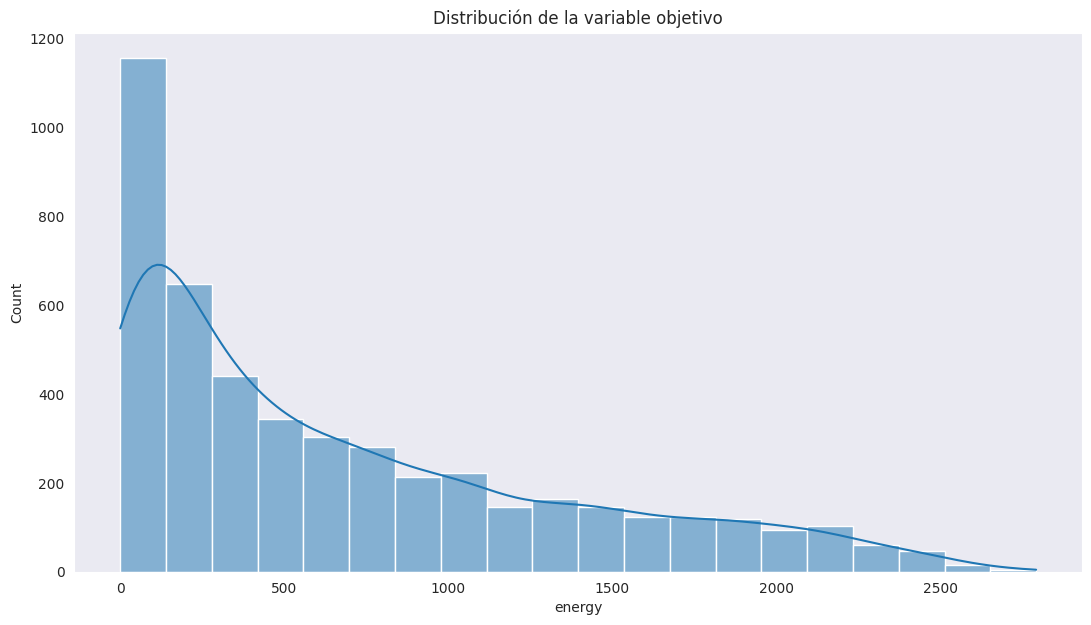

In [7]:
sns.set_style("dark")
plt.figure(figsize=(13,7))
sns.histplot(data.energy,kde = True, bins = 20)
plt.title("Distribución de la variable objetivo")


Se puede observar que la mayoría de datos se encuentran por debajo de 500 de energía, aunque la variable alcance datos de hasta 2700, los datos siguen una distribución benford. Esto explica los valores de la desviación típica antes analizados, y demuestra que los datos están dispersos pero con una mayoría en los valores bajos, lo que significa que la mayoría de los días se consigue poca energía. 

Text(0.5, 1.0, 'Diagrama de caja que muestra los valores atípicos')

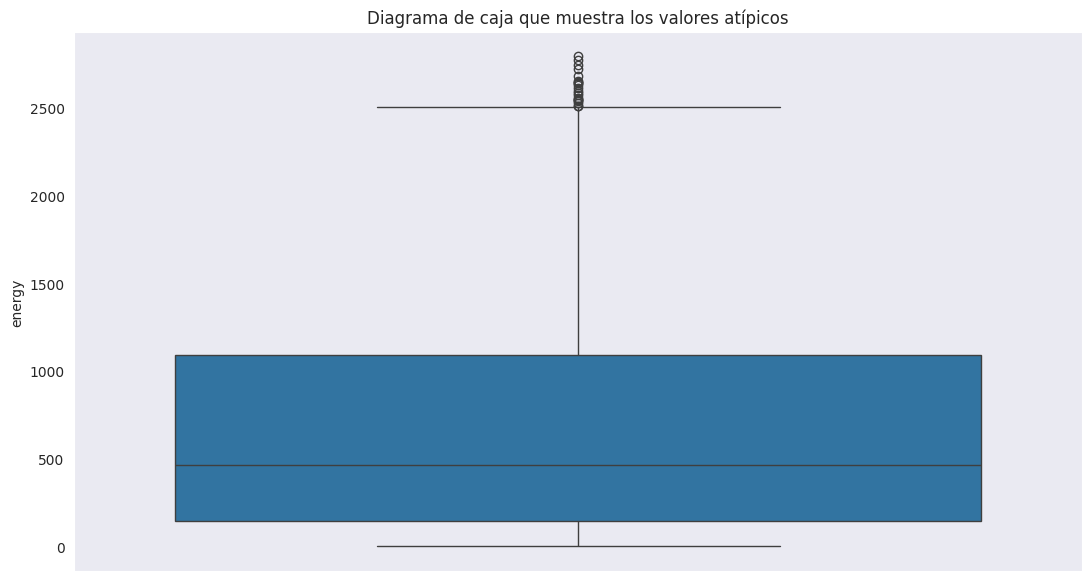

In [8]:
sns.set_style("dark")
plt.figure(figsize= (13,7))
sns.boxplot(data.energy)
plt.title("Diagrama de caja que muestra los valores atípicos")

Existen diversos datos atípicos, por lo que se procede al análisis y conteo de estos para comprobar su naturaleza y confirmar si es necesario eliminarlos. 

In [9]:
Q1 = data['energy'].quantile(0.25)
Q3 = data['energy'].quantile(0.75)
IQR = Q3 - Q1

# identificar valores atípicos
threshold = 1.5
outliers = data["energy"][(data['energy'] < Q1 - threshold * IQR) | (data['energy'] > Q3 + threshold * IQR)]
print(outliers)
print(outliers.size)

303     2574.03
377     2610.74
1046    2513.07
1083    2628.17
1084    2556.86
1120    2596.75
1164    2723.12
1165    2646.15
1203    2774.89
1401    2508.97
1564    2552.41
3019    2547.09
3541    2526.31
4057    2536.88
4108    2586.51
4547    2639.04
4596    2547.25
4626    2745.86
4641    2640.18
4680    2792.55
4682    2680.34
4713    2652.85
Name: energy, dtype: float64
22


Aunque se encuentran outliers, parece que estos corresponden a los meses fríos, por lo que se considera que estos no son valores atípicos causados por error sino por condiciones atmosféricas distintas. Además, al realizar un conteo de estos valores atípicos se comprueba que de 4748 valores, 616 son atípicos, lo cual es más de un 10% de los datos. Se considera que teniendo esto en cuenta, no es necesario considerar estos valores de manera distinta.  

Se realiza también un estudio de la distribución de datos según año y mes, para comprobar la cantidad de datos disponibles dependiendo de estos e identificar desigualdades imporantes para la división de los datos futura en el entrenamiento:

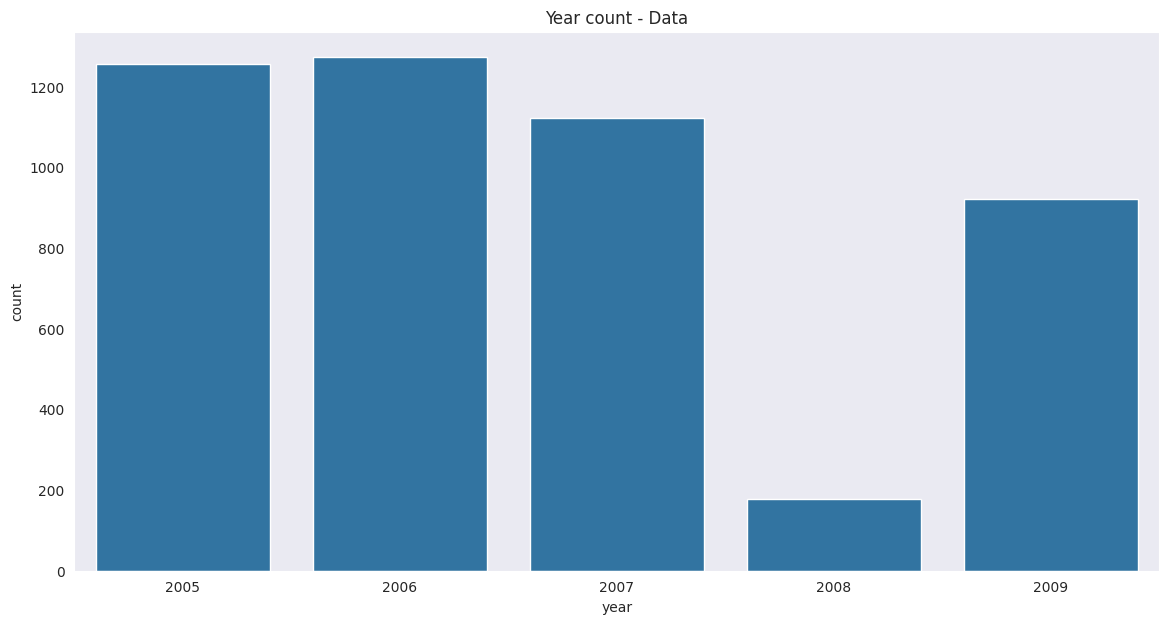

In [11]:
plt.figure(figsize= (14,7))
sns.countplot(x = "year", data = data)
plt.title("Year count - Data")
plt.show()

Se puede comprobar que aunque los primeros tres años contengan un número similar de datos, 2008 contiene menos de un cuarto de los datos que contienen el resto de años y 2009 aunque más cercano a los otros 3, sigue siendo significativamente menor. Esta difwerencia será necesario tenerla en cuenta más adelante en el entrenamiento, al necesitar tener en cuenta el valor positivo o negativo que puede tener la existencia de 2008 para el modelo. 

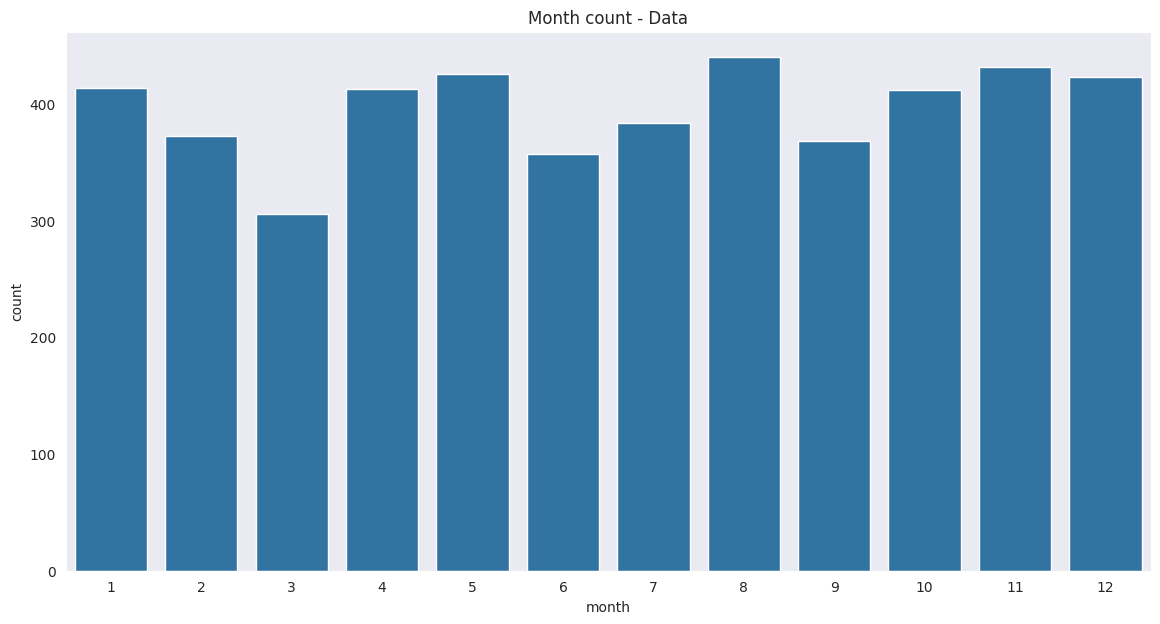

In [12]:
plt.figure(figsize= (14,7))
sns.countplot(x = "month", data = data)
plt.title("Month count - Data")
plt.show()

En el caso de los meses aunque existan ciertas disparidades entre ellos, estas son mucho menores y probablemente se deban a las diferencias entre años. Por lo tanto, estas no se tendrán en cuenta en el futuro. 

Una vez comprobado el número de datos por cantidades de tiempo se comprueba el valor de la energía según estas medidas:

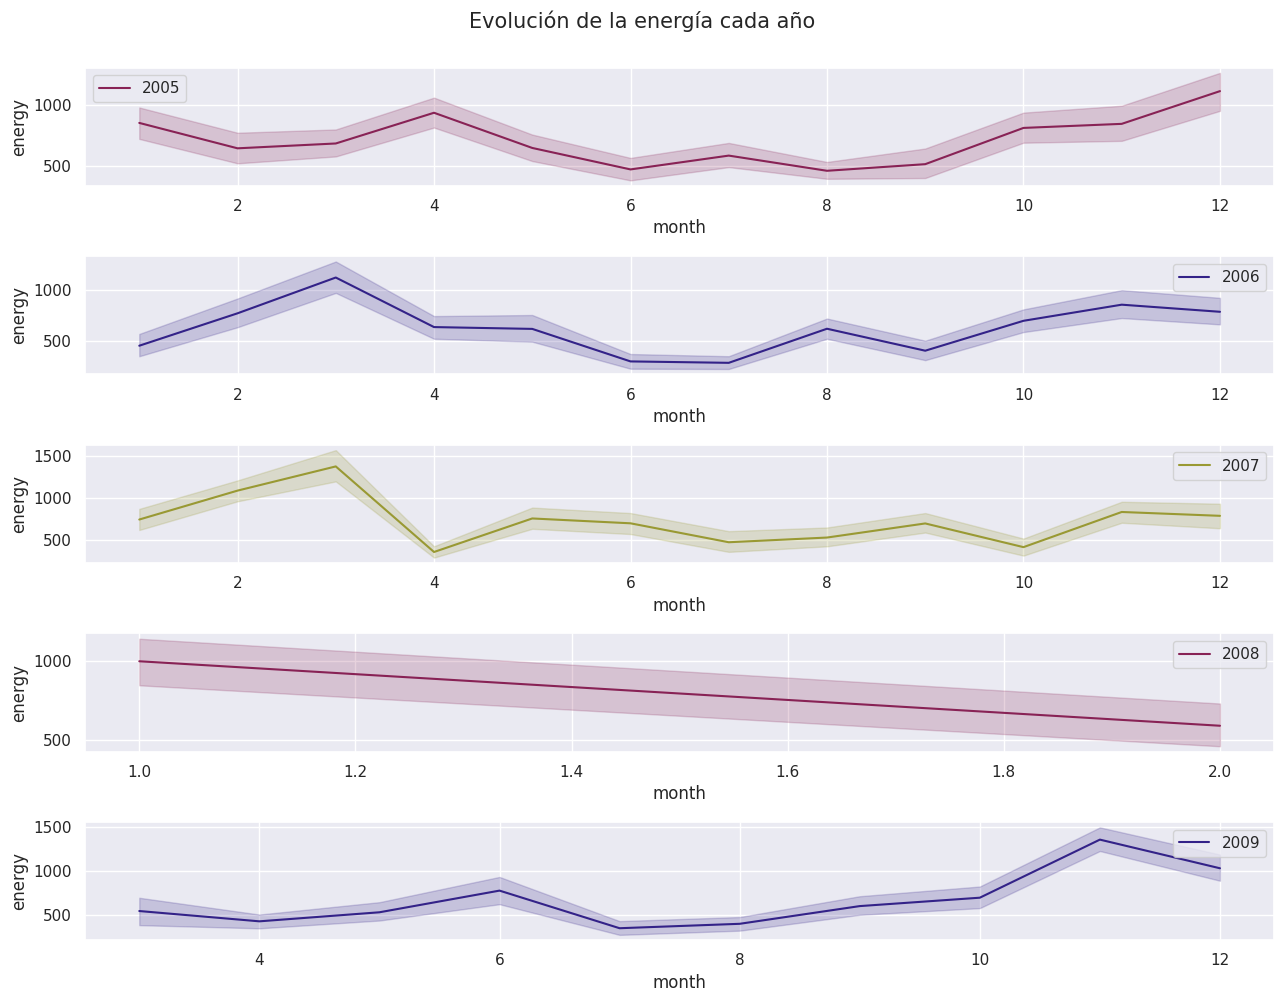

In [75]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize = (13, 10))
fig.suptitle('Evolución de la energía cada año', y=1.0, fontsize = 15)

for ax, data_, year, color, in zip(axes.flatten(), data, data.year.unique(), ['#882255','#332288', '#999933', '#882255','#332288', 'orangered']):
  df = data[data.year == year]
  sns.lineplot(x=df.month,y= df.energy, ax = ax, label = year, color = color)
plt.legend()
plt.tight_layout()

Se puede observar que los valores más altos se dan siempre a finales de año o en los primeros meses de esto, lo cual concuerda con la teoría planteada para los valores atípicos. Esto, además, coincide con lo razonable teóricamente en la producción de energía, siendo las estaciones de otoño o invierno las que más viento tienen. Además, se puede observar el efecto de la falta de datos para 2008, que cuenta con una gráfica muy poco representativa. 

## Evalución de las Correlaciones de las propiedades y filtrado atributos

Con el objetivo de filtrar atributos que estén fuertemente ligados se realiza un estudio de las correlaciones, en el que se observarán aquellas columnas con una correlación mayor a 0.98. Esto se hace con el objetivo de tener candidatos a columnas que eliminar para conseguir reducir la dimensionalidad del espacio y simplificar los modelos sin afectar a los resultados. 

Index(['datetime', 'energy', 'p54.162.13', 'p55.162.13', 'cape.13',
       'p59.162.13', 'lai_lv.13', 'lai_hv.13', 'u10n.13', 'v10n.13', 'sp.13',
       'stl1.13', 'u10.13', 'v10.13', 't2m.13', 'stl2.13', 'stl3.13',
       'iews.13', 'inss.13', 'stl4.13', 'fsr.13', 'flsr.13', 'u100.13',
       'v100.13', 'year', 'month', 'day', 'hour'],
      dtype='object')
0.9802767532748907
0.9986147399001334
0.9986147399001334
0.9943128113164796
0.9780240443597741
0.995934812980231
0.9558746848828626
0.9835106133444562
0.9707703572093923
0.9943128113164796
0.9898201481175758
0.995934812980231
0.9919376894436299
0.9707703572093923
0.9558746848828626
0.9780240443597741
0.9898201481175758
0.9835106133444562
0.9919376894436299
0.9802767532748907
{'stl1.13', 'lai_hv.13', 'inss.13', 'v10.13', 'v100.13', 't2m.13', 'lai_lv.13', 'v10n.13', 'datetime', 'u10.13', 'u100.13', 'year', 'u10n.13'}


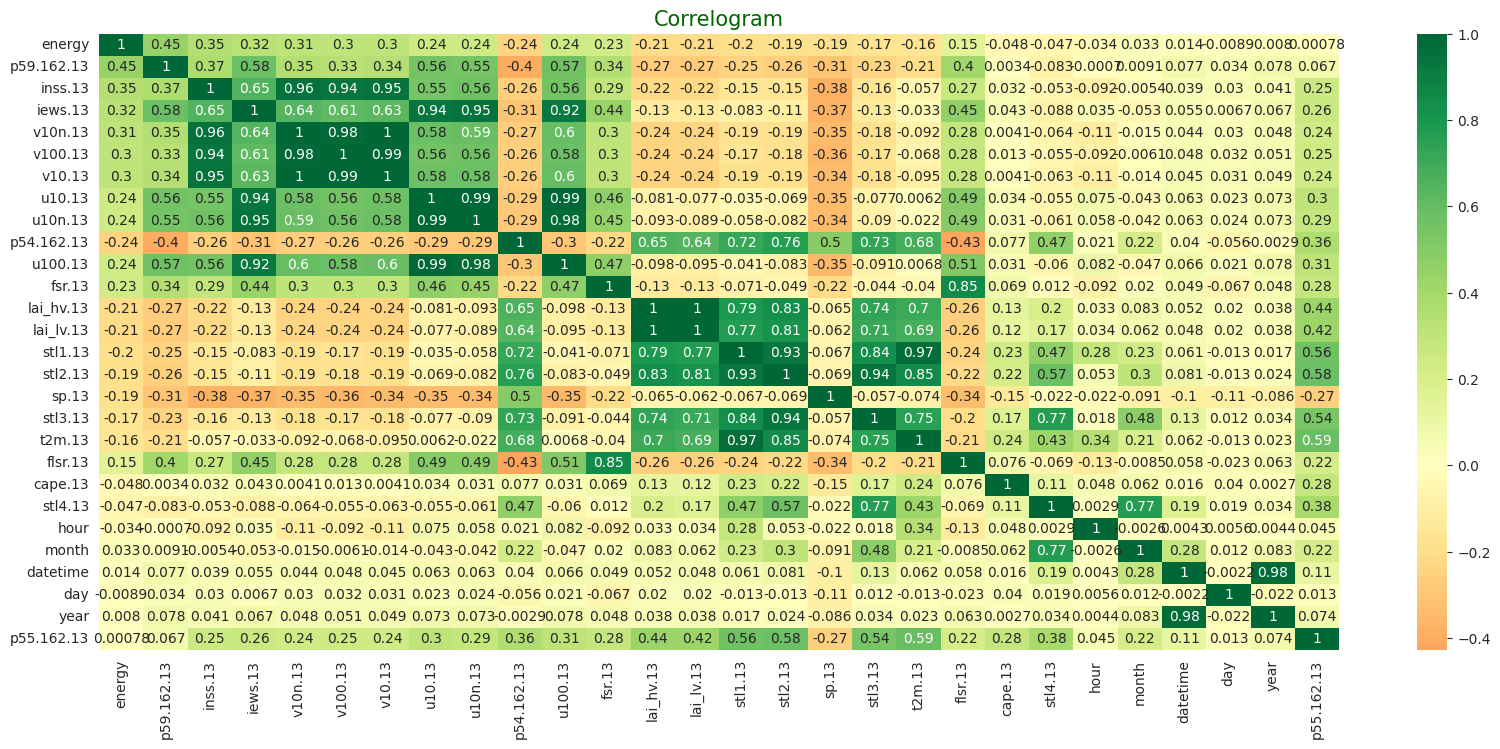

In [13]:
correlations = data.corr()
tamaño = data.shape
corr_lineales = set()
corrs = abs(correlations['energy']).sort_values(ascending = False)
print(correlations.columns)
for col in correlations.columns:
    for elem in correlations[col]:
        if elem > 0.95 and elem != correlations[col][col]:
            corr_lineales.add(col)
            print(elem)
print(corr_lineales)
corr = data[list(corrs.index)].corr()
plt.figure(figsize = (20, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

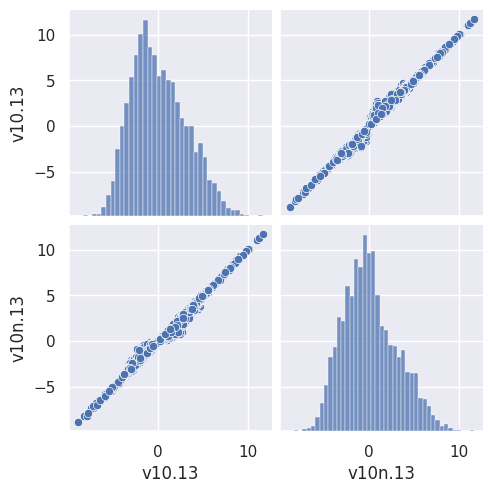

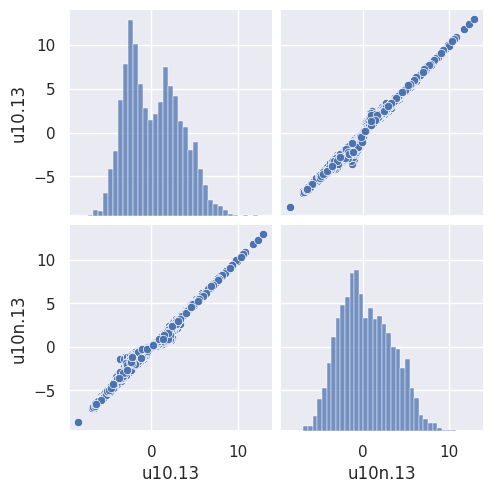

In [14]:
sns.set_theme()
wind_deriv_u = ['u10.13', 'u10n.13']
wind_deriv_v = ['v10.13', 'v10n.13']
sns.pairplot(data[wind_deriv_v], height = 2.5)
sns.pairplot(data[wind_deriv_u], height = 2.5)
plt.show()

Aunque se hayan encontrado más de 4 distintas columnas con una correlación entre ellas superior a 0.98, se ha decidido solo eliminar 2 columnas, cada una perteneciente a un par 10,10n. Esta decisión es debido a que aunque columnas como v10 y v100 sean parecidas, conceptualmente representan el viento a 10 y 100 metros de altura, diferencia que se cree que es lo suficientemente importante como para mantener ambas columnas. En el caso de columnas como u10 y u10n, sin embargo, estas solo representan los mismos datos, con ciertas transformaciones aplicadas para la adaptación de los sistenas de medición a distintas condiciones meteorológicas[1]. Es por esta relación y por la alta correlación lineal que se ha decidido eliminar las columnas v10 y u10, ya que la información que estas aportan es ignorable si se cuenta con u10n y v10n, sus correspondientes versiones tranformadas.

 >   1. Liu, W Timothy Liu & Tang, Wenqing & Xie, Xiaosu. (2010). Wind Power at Sea as Observed from Space. 10.5772/8344. 

In [15]:
print(data.shape)
data = data.drop(['v10.13', 'u10.13'], axis = 1)
print(data.shape)


(4748, 28)
(4748, 26)


### Conclusión 


Después de todo el análisis se puede concluir que se cuenta con una base de datos en la que la variable objetivo tiene valores dispersos principalmente bajos, con valores más altos en meses fríos. Cabe recalcar la falta de datos del año 2008, que afectará todo el ejercicio de entrenamiento posterior, así como la eliminación de dos columnas por su correlación y signficado. Los datos no cuentan con ningún error notable, como columnas constantes o valores faltantes, con necesidad de corrección y al ser todas las columnas numéricas las operaciones posteriores se realizarán sin pasos extra. 

# Definición de evaluaciones inner y outer y métricas

### Outer
Al ser los datos una serie temporal se ha decidido utilizar la técnica de Hold out, ya que se considera mejor opción utilizar solo los datos más recientes para la evaluación de rendimiento futuro. Esto se justifica al ser más cercano a la realizad ya que todos los nuevos datos que se vayan a querer predecir van a ser de un tiempo futuro, por lo que utilizar los datos disponibles del año más reciente es la aproximación más cercana posible. En el EDA se ha podido comprobar que los años 2008 y 2009 cuentan con un número mucho menor de datos que los otros 3, por lo tanto, se van a utilizar ambos años para las pruebas, consiguiendo así también que los datos de entrenamiento sean más balanceados al no introducir años incompletos. A continuación, se realiza un conteo de los datos que van a ser utilizados para cada una de las dos partes:

In [17]:
num_datos_anio = data.year.value_counts()
numero_datos_test =  data.year.value_counts()[2009] + data.year.value_counts()[2008]
numero_datos_train =  data.year.value_counts()[2007] + data.year.value_counts()[2006] + data.year.value_counts()[2005]
print(num_datos_anio, numero_datos_test, numero_datos_train)
print((100/4748)*numero_datos_test)

year
2006    1272
2005    1256
2007    1121
2009     921
2008     178
Name: count, dtype: int64 1099 3649
23.146588037068238


Se puede comprobar que después de la división se consigue unos porcentajes de alrededor del 23% para test, y el 77% para train. A continuación, se realiza la partición de los datos en train y test, comprobando que efectivamente se ha dividido correctamente y todos los datos de 2008 y 2009 están en el train. 

In [18]:
train, test = train_test_split(data, test_size=1099, shuffle=False)

print(f"Fechas de train: {train.iloc[0].datetime} - {train.iloc[-1].datetime}")
print(f"Fechas de test: {test.iloc[0].datetime} - {test.iloc[-1].datetime}")

Fechas de train: 2005-01-02 18:00:00 - 2007-12-31 18:00:00
Fechas de test: 2008-01-01 00:00:00 - 2009-12-31 18:00:00


Además de dividir en train y test es necesario dividir los datos en atributos y variables resultados. Para esto, se deja como y únicamente la columna objetivo de energía, mientras que a X se le quita las columnas de energía y todas las relacionadas con fechas:

In [19]:
X_train = train.drop(['datetime', 'energy', 'hour','day', 'month', 'year'], axis='columns')
y_train = train[['energy']]

X_test = test.drop(['datetime', 'energy', 'hour','day', 'month', 'year'], axis='columns')
y_test = test[['energy']]

In [20]:
std_train=np.std(train['energy'])
print(f"La desviación típica de train es: {std_train}")
quantile_75per = np.quantile(train['energy'], 0.75)
print(f"El 3er cuartil es de train es: {quantile_75per}")

La desviación típica de train es: 660.7635894139271
El 3er cuartil es de train es: 1083.13


### Inner
Para la elección de la técnica para inner evaluation en el ajuste de hiperparámetros y la elección de scaler para el entrenamiento, se ha decidido utilizar *time series split*, al estar los datos en una serie temporal. Se ha utilizado la misma lógica que para la elección de la técnica de outer, sin embargo, al ser el número de años un número tan reducido, se podría utilizar KFold Cross Validation y conseguir un resultado similar. 

Con *time series split*, teniendo 3 años distintos de datos para test, se ha decidio crear tres *splits* aproximados, ya que aunque se pueden crear a mano para asegurarse de tener exactamente los datos de cada año en un grupo distinto, esto lleva a problemas de compatibilidad con las funciones por una ganancia pequeña. Cada uno de los *splits* contiene aproximadamente uno de los años entre 2005 y 2007, pero al tener cada uno un número de datos ligeramente distintos, se acaba con unos 100 datos descolocados. Teniendo en cuenta que el tamaño de train es de alrededor de 4000 datos, se considera que 100 de estos en splits no correspondientes a su año no afectan al funcionamiento de time series splits, especialmente al disponer de solo 3 años. Así, la división inner que se utilizará durante todo el entrenamiento resulta en:

In [21]:
inner = TimeSeriesSplit(3)

Los grupos resultantes serán, aproximadamente:
- train: 2005, test: 2006
- train: 2005, 2006, test: 2007


### Métrica
Como métrica para la elección de hiperparámetros y scalers se ha elegido la raiz del error cuadrático medio(RMSE), considerando esta correcta tras las comprovaciones del tipo de datos con el que se opera. El RMSE depende de la escala de los datos, lo cual puede causar confusión, por lo que además tras calcular el error del dummy se utilizará este para obtener en cada elección de hiperparámetros el relative square error, o RSE. De esta manera se consigue un resultado equivalente pero con valores entre 0 y 1, más fácilmente entendibles. 

Además, se va a comprobar el tiempo de entrenamiento y predicción en cada modelo para comprobar también la eficiencia computacional de cada opción. Para ello se usará el siguiete esquema:

In [22]:
import time
start = time.time()
#model.fit(X, y)
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")

Tiempo de entrenamiento: 3.0994415283203125e-05s


# Elección de Scaler para el entrenamiento de los modelos


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import NuSVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score


Una vez realizadas las divisiones de las estructuras de inner y outer y decidido que métricas se van a utilizar para comparar modelos, se procede a la fase de elección del escalador que se utilizará en el entrenamieto de todos los modelos que los necesiten. Para esta tarea se utiliza el modelo KNNeighbors con los parámetros por defecto, almaceando el mejor resultado del RMSE así como el tiempo de ejecución utilizado para cada escalador. En esta fase no se utiliza el RSE al ser anterior a la realización del modelo Dummy. 

Para mantener la consistencia durante todo el entrenamiento se utilizará en todos los casos GridSearchCV, el cual con un *param_grid* vacío es equivalente a cross_validation sin hiperparámetros. Con este modelo, se prueban, en orden, MinMaxScaler, StadardScaler y RobustScaler.

In [24]:
best_scores_scaler = {}
time_train_scaler = {}
start = 0
stop = 0


# MIN MAX SCALER
pipeline_minmax = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsRegressor())])
param_grid = {}

min_max_scaler = GridSearchCV(pipeline_minmax, param_grid, cv=inner, scoring= 'neg_root_mean_squared_error')

start = time.time()
min_max_scaler.fit(X_train, y_train)
stop = time.time()

time_train_scaler['tiempo de minmax'] = (stop - start)
best_scores_scaler['Error para minmax'] = -min_max_scaler.best_score_


# STANDARD SCALER
pipeline_standard = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])
standard_scaler = GridSearchCV(pipeline_standard, param_grid, cv=inner, scoring= 'neg_root_mean_squared_error')

start = time.time()
standard_scaler.fit(X_train, y_train)
stop = time.time()

time_train_scaler['tiempo de standard'] = (stop - start)
best_scores_scaler['Error para standard'] = -standard_scaler.best_score_

# ROBUST SCALER
pipeline_robust = Pipeline([('scaler', RobustScaler()), ('knn', KNeighborsRegressor())])
robust_scaler = GridSearchCV(pipeline_robust, param_grid, cv=inner, scoring= 'neg_root_mean_squared_error')

start = time.time()
robust_scaler.fit(X_train, y_train)
stop = time.time()

time_train_scaler['tiempo de robust'] = (stop - start)
best_scores_scaler['Error para robust'] = -robust_scaler.best_score_

# RESULTADOS
print("Best Score de cada scaler:")
for scaler, score in best_scores_scaler.items():
    print(f"\t{scaler}: {score}")

print("Tiempo de entreamieto de cada scaler:")
for scaler, train_t in time_train_scaler.items():
    print(f"\t{scaler}: {train_t}")

Best Score de cada scaler:
	Error para minmax: 496.8381919996184
	Error para standard: 455.6077474012443
	Error para robust: 461.48559778061895
Tiempo de entreamieto de cada scaler:
	tiempo de minmax: 0.11296629905700684
	tiempo de standard: 0.07015132904052734
	tiempo de robust: 0.09660911560058594


Al probar todos los scalers con las mismas condiciones, se puede concluir que el más adecuado para el problema es el escalador Estandar, *StandardScaler*. Este no solo ha sido más rápido que las otras dos opciones, sino que además cuenta con un 1.3% menos de error respecto a la siguiente mejor opción, el escalador robusto. Esta mejora no es demasiado significativa, pero combinada con ser el escalador más rápido, provoca su elección clara respecto a los otros dos. 

In [25]:
porcentaje = (100/best_scores_scaler['Error para standard'])
mejora = (porcentaje*best_scores_scaler['Error para robust'] - 100)
print("Mejora de standard sobre robust: ", mejora,"%")

Mejora de standard sobre robust:  1.2901120345080983 %


# Entrenamiento de los distintos modelos

### DUMMY

Se entrena un modelo dummy usando la estrategia *mean*, ya que durante todo el proceso se va a utilizar RMSE. El error obtenido será el necesario a superar por todos los modelos posteriores para poder considerarlos como válidos. En esta sección también se definen todos los diccionarios que serán utilizados para almacenar los datos relevantes de todos los modelos, con el objetivo de compararlos posteriormente. 

In [26]:
best_scores = {}
best_scores_rse = {}
best_params = {}
time_train = {}
start = 0
stop = 0

empty_param_grid = {}

pipeline_dummy = Pipeline([('dummy', DummyRegressor(strategy="mean"))])
dummy_model = GridSearchCV(pipeline_dummy, empty_param_grid, cv=inner, scoring= 'neg_root_mean_squared_error')
start = time.time()
dummy_model.fit(X_train, y_train)
stop = time.time()
time_train['Tiempo de dummy'] = (stop - start)

best_scores['Error para dummy'] = -dummy_model.best_score_

print(f"Error para dummy: {-dummy_model.best_score_}")
print(f"Tiempo de dummy: {stop-start}")


Error para dummy: 676.7395648321348
Tiempo de dummy: 0.019306659698486328


Para poder utilizar el valor de error en el cálculo del RSE más adelante este se almacena en la variable *dummy_value*. 

In [27]:
dummy_value = best_scores['Error para dummy']
print(dummy_value)

676.7395648321348


### KNN

El primero método analizado es KNN, el cual necesitará usar el escaler antes elegido, StandardScaler. El modelo de KNN sin hiperparámetros conseguirá los mismos resultados que la ejecución de StandardScaler en la elección de escaladores, sin embargo, se ha repetido la operación para almacenar todos los datos necesarios correctamente. A partir de este modelo, se almacenan y analizan los valores de RSE, utilizando el valor antes obtenido del dummy. 

In [28]:
pipeline_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])
knn_model = GridSearchCV(pipeline_knn, empty_param_grid, cv=inner, scoring= 'neg_root_mean_squared_error')

start = time.time()
knn_model.fit(X_train, y_train)
stop = time.time()

time_train['Tiempo de knn sin HPO'] = (stop - start)
best_scores['Error para knn sin HPO'] = -knn_model.best_score_
best_scores_rse['RSE para knn sin HPO'] = (best_scores['Error para knn sin HPO']/dummy_value)

print(f"Error para KNN sin HPO: {best_scores['Error para knn sin HPO']}")
print(f"RSE para KNN sin HPO: {best_scores_rse['RSE para knn sin HPO']}")
print(f"Tiempo de ejecución de KNN sin HPO: {time_train['Tiempo de knn sin HPO']}")


Error para KNN sin HPO: 455.6077474012443
RSE para KNN sin HPO: 0.673239413029232
Tiempo de ejecución de KNN sin HPO: 0.0686483383178711


El modelo prueba ser rápido y conseguir un error de alrededor de 0.67, por lo que aunque no demasiado preciso, es válido. Por lo tanto, se procede a realizar el ajuste de hiperparámetros, en el que se tendrá en cuenta el número de vecinos, el peso de la distancia, y p, el coeficiente. Para decidir los valores de estos se han realizado ejecuciones en las que se aumenta el espacio de búsqueda en caso de que uno de los hiperparámetros elegidos sea el límite de la rejilla definida. Así, el modelo final es:

In [29]:
param_knn = {'knn__n_neighbors': np.arange(2,20,1),
              'knn__weights':  ['uniform','distance'],
              'knn__p': [1,2]}

pipeline_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])
knn_model = GridSearchCV(pipeline_knn, param_knn, cv=inner, scoring= 'neg_root_mean_squared_error')

start = time.time()
knn_model.fit(X_train, y_train)
stop = time.time()

time_train['Tiempo de knn con HPO'] = (stop - start)
best_params['Params elegidos para knn con HPO'] = knn_model.best_params_
best_scores['Error para knn con HPO'] = -knn_model.best_score_
best_scores_rse['RSE para knn con HPO'] = (best_scores['Error para knn con HPO']/dummy_value)

print(f"Mejores parametros para KNN con HPO: {best_params['Params elegidos para knn con HPO']}")
print(f"Error para KNN con HPO: {best_scores['Error para knn con HPO']}")
print(f"RSE para KNN con HPO: {best_scores_rse['RSE para knn con HPO']}")
print(f"Tiempo de ejecución de KNN con HPO: {time_train['Tiempo de knn con HPO']}")


Mejores parametros para KNN con HPO: {'knn__n_neighbors': 12, 'knn__p': 1, 'knn__weights': 'distance'}
Error para KNN con HPO: 430.40847492956453
RSE para KNN con HPO: 0.6360031203973235
Tiempo de ejecución de KNN con HPO: 5.7413225173950195


Este modelo tiene un mayor tiempo de ejecución respecto al modelo sin hiperparámetros, lo cual es razonable al necesitar probar las distintas opciones proporcionadas por *param_knn*. El mejor resultado de RSE cuenta con 0.63 de error, lo cual es una mejora sobre el modelo sin hiperparámetros justificando así la realización el ajuste. 

Tras estas pruebas se ha realizado una ejecución utilizando mahalanobis, probando que no solo es exponencialmente más lenta sino que además el error causado es mayor a minkowski sin hiperparámetros, teniendo un valor de RSE de casi 0,9. Por estos motivos, se ha descartado la idea de utilizar esta nueva metrica y no se almacenan los resultados del modelo para comparaciones posteriores. 

In [30]:
param_knn = {'knn__n_neighbors': np.arange(2,22,1),
              'knn__weights':  ['uniform','distance'],
              'knn__p': [1,2],
              'knn__metric': ['mahalanobis'],
              'knn__metric_params': [{'VI': np.cov(X_train)}]}

pipeline_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])
knn_model = GridSearchCV(pipeline_knn, param_knn, cv=inner, scoring= 'neg_root_mean_squared_error')

start = time.time()
knn_model.fit(X_train, y_train)
stop = time.time()



print(f"Mejores parametros para KNN con mahalanobis: {knn_model.best_params_}")
print(f"Error para KNN con mahalanobis: {-knn_model.best_score_}")
print(f"RSE para KNN con mahalanobis: {(-knn_model.best_score_)/dummy_value}")
print(f"Tiempo de ejecución de KNN con mahalanobis: {stop-start}")


Mejores parametros para KNN con mahalanobis: {'knn__metric': 'mahalanobis', 'knn__metric_params': {'VI': array([[3.91483631e+11, 3.77187306e+11, 3.73334976e+11, ...,
        4.01387185e+11, 3.26909830e+11, 3.31142455e+11],
       [3.77187306e+11, 3.65618237e+11, 3.62402790e+11, ...,
        3.84688269e+11, 3.24165381e+11, 3.27439495e+11],
       [3.73334976e+11, 3.62402790e+11, 3.59336903e+11, ...,
        3.80279244e+11, 3.23017221e+11, 3.26068784e+11],
       ...,
       [4.01387185e+11, 3.84688269e+11, 3.80279244e+11, ...,
        4.13430189e+11, 3.26670865e+11, 3.31754627e+11],
       [3.26909830e+11, 3.24165381e+11, 3.23017221e+11, ...,
        3.26670865e+11, 3.11317469e+11, 3.11500171e+11],
       [3.31142455e+11, 3.27439495e+11, 3.26068784e+11, ...,
        3.31754627e+11, 3.11500171e+11, 3.12021730e+11]])}, 'knn__n_neighbors': 20, 'knn__p': 1, 'knn__weights': 'uniform'}
Error para KNN con mahalanobis: 589.9022354658257
RSE para KNN con mahalanobis: 0.8716827951564365
Tiempo de

## Arboles de regresión 

Para los modelos que utilizan arboles de regresión ha sido necesario definir explícitamente la semilla a utilizar en *random_state*, ya que en caso contrario se elige una al azar en cada ejecución, provocando que el resultado de error no sea útil en el futuro. 

In [31]:
pipeline_tree = Pipeline([('scaler', StandardScaler()), ('tree', DecisionTreeRegressor(random_state=SEED))])
tree_model = GridSearchCV(pipeline_tree, empty_param_grid, cv=inner, scoring= 'neg_root_mean_squared_error')

start = time.time()
tree_model.fit(X_train, y_train)
stop = time.time()

time_train['Tiempo de arbol sin HPO'] = (stop - start)
best_scores['Error para arbol sin HPO'] = -tree_model.best_score_
best_scores_rse['RSE para arbol sin HPO'] = (best_scores['Error para arbol sin HPO']/dummy_value)

print(f"Error para arbol sin HPO: {best_scores['Error para arbol sin HPO']}")
print(f"RSE para arbol sin HPO: {best_scores_rse['RSE para arbol sin HPO']}")
print(f"Tiempo de ejecución de arbol sin HPO: {time_train['Tiempo de arbol sin HPO']}")


Error para arbol sin HPO: 526.1953693260583
RSE para arbol sin HPO: 0.777544858717668
Tiempo de ejecución de arbol sin HPO: 0.5220668315887451


El arbol por defecto cuenta con un error de 0.77, lo cual lo marca como peor que todos los modelos ya contemplados anteriormente, aunque igualmente válida. Además, ya la versión sin hiperparámetros es más lenta que la correspondiente de KNN. 

Para conseguir hiperparámetros en el árbol se ha definido un espacio de busqueda en el que comprobar *max_depth*, *min_samples_split* y *min_impurity_decrease*, ya estudiados durante el curso. Los valores iniciales se han definido según lo definido en el temario, pero este ha sido modificado hasta encontrar un rango en el que el valor elegido no fuese el borde de este. Así, el GridSearch resultante es:

In [32]:
tree_params = {'tree__max_depth': np.arange(4,10,2),
               'tree__min_samples_split':np.arange(30,70,5),
               'tree__min_impurity_decrease':[0.0, 1.0]}

pipeline_tree = Pipeline([('tree', DecisionTreeRegressor(random_state=SEED))])
tree_model = GridSearchCV(pipeline_tree, tree_params, cv=inner, scoring= 'neg_root_mean_squared_error')

start = time.time()
tree_model.fit(X_train, y_train)
stop = time.time()

time_train['Tiempo de arbol con HPO'] = (stop - start)
best_params['Params elegidos para arbol con HPO'] = tree_model.best_params_
best_scores['Error para arbol con HPO'] = -tree_model.best_score_
best_scores_rse['RSE para arbol con HPO'] = (best_scores['Error para arbol con HPO']/dummy_value)

print(f"Mejores parametros para arbol con HPO: {best_params['Params elegidos para arbol con HPO']}")
print(f"Error para arbol con HPO: {best_scores['Error para arbol con HPO']}")
print(f"RSE para arbol con HPO: {best_scores_rse['RSE para arbol con HPO']}")
print(f"Tiempo de ejecución de arbol con HPO: {time_train['Tiempo de arbol con HPO']}")


Mejores parametros para arbol con HPO: {'tree__max_depth': 8, 'tree__min_impurity_decrease': 0.0, 'tree__min_samples_split': 55}
Error para arbol con HPO: 424.57153599170505
RSE para arbol con HPO: 0.6273780314544193
Tiempo de ejecución de arbol con HPO: 5.379947185516357


Aunque la versión sin HPO fuese peor que los modelos de KNN, en caso de utilizar hiperparámetros se logra un modelo con un RSE de 0.627, alrededor de un 1% mejor que KNN con HPO. Este modelo no solo es válido sino que pasa a ser el mejor resultado hasta este punto. 

## Regresión lineal

En los modelos de regresión lineal base se ha decidido mantener el scaler para evitar problemas de decisión o de falta de convergencia, avisos que han ocurrido respectivamente en la ejecucion de *LinearRegression* y *Lasso*. Aún así, en el modelo sin hiperparámetros de regresión lineal simple se ha podido comprobar que el resultado es el mismo con y sin estos escaladores, lo cual concuerda con la teoría sobre este. Este es el único caso en el que es posible la ejecución sin el escalador. 

En regresión líneal no existen hiperparámetros importantes, aun así, se ha decidido probar algunos de los disponibles para demostrar que en ambos casos el resultado es el mismo. 

In [33]:
pipeline_regrl = Pipeline([('scaler', StandardScaler()),('regr', LinearRegression())])
regr_model = GridSearchCV(pipeline_regrl, empty_param_grid, cv=inner, scoring= 'neg_root_mean_squared_error')

start = time.time()
regr_model.fit(X_train, y_train)
stop = time.time()

time_train['Tiempo de regr lineal sin HPO'] = (stop - start)
best_scores['Error para regr lineal sin HPO'] = -regr_model.best_score_
best_scores_rse['RSE para regr lineal sin HPO'] = (best_scores['Error para regr lineal sin HPO']/dummy_value)

print(f"Error para regresion sin HPO: {best_scores['Error para regr lineal sin HPO']}")
print(f"RSE para regresion sin HPO: {best_scores_rse['RSE para regr lineal sin HPO']}")
print(f"Tiempo de ejecución de regresion sin HPO: {time_train['Tiempo de regr lineal sin HPO']}")


Error para regresion sin HPO: 577.2679522410928
RSE para regresion sin HPO: 0.8530134519093532
Tiempo de ejecución de regresion sin HPO: 0.13016057014465332


In [34]:
regr_params = {'regr__copy_X': [True, False],
               'regr__fit_intercept': [True, False],
               'regr__positive': [True, False],
               'regr__n_jobs': [1, 3, 5, 7]
               }

pipeline_regrl = Pipeline([('scaler', StandardScaler()), ('regr', LinearRegression())])
regr_model = GridSearchCV(pipeline_regrl, regr_params, cv=inner, scoring= 'neg_root_mean_squared_error')

start = time.time()
regr_model.fit(X_train, y_train)
stop = time.time()

time_train['Tiempo de regr lineal con HPO'] = (stop - start)
best_params['Params elegidos para regr lineal con HPO'] = regr_model.best_params_
best_scores['Error para regr lineal con HPO'] = -regr_model.best_score_
best_scores_rse['RSE para regr lineal con HPO'] = (best_scores['Error para regr lineal con HPO']/dummy_value)

print(f"Mejores parametros para regresion con HPO: {best_params['Params elegidos para regr lineal con HPO']}")
print(f"Error para regresion con HPO: {best_scores['Error para regr lineal con HPO']}")
print(f"RSE para regresion con HPO: {best_scores_rse['RSE para regr lineal con HPO']}")
print(f"Tiempo de ejecución de regresion con HPO: {time_train['Tiempo de regr lineal con HPO']}")

Mejores parametros para regresion con HPO: {'regr__copy_X': True, 'regr__fit_intercept': True, 'regr__n_jobs': 1, 'regr__positive': False}
Error para regresion con HPO: 577.2679522410928
RSE para regresion con HPO: 0.8530134519093532
Tiempo de ejecución de regresion con HPO: 26.416494131088257


Después de ambas ejecuciones se confirma que en HPO los parámetros elegidos son los mismos que se utilizan por defecto, y por lo tanto, el resultado en ambos casos es el mismo. La única diferencia se encuentra en el tiempo de ejecución, que es un 2000% mayor en HPO gracias al número de ejecuciones necesarias. Al conseguir en los dos modelos el mismo resultado se considera que en esta situación sería mejor utilizar la opción sin hiperparámetros por la ganancia de tiempo que esta conlleva. 

El modelo tiene el mayor error y tiempo de ejecución de todos los probados hasta el momento, por lo que esto y los problemas enumerados anteriormente llevan a la decisión de descartarlo como opción para el modelo final. Aun habiendo descartado la regresión lineal simple, se procede a probar la regresión lineal Lasso en busca de mejores resultados. 

In [35]:
pipeline_lasso = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])
lasso_model = GridSearchCV(pipeline_lasso, empty_param_grid, cv=inner, scoring= 'neg_root_mean_squared_error')

start = time.time()
lasso_model.fit(X_train, np.ravel(y_train))
stop = time.time()

time_train['Tiempo de lasso sin HPO'] = (stop - start)
best_scores['Error para lasso sin HPO'] = -lasso_model.best_score_
best_scores_rse['RSE para lasso sin HPO'] = (best_scores['Error para lasso sin HPO']/dummy_value)

print(f"Error para Lasso sin HPO: {best_scores['Error para lasso sin HPO']}")
print(f"RSE para Lasso sin HPO: {best_scores_rse['RSE para lasso sin HPO']}")
print(f"Tiempo de ejecución de Lasso sin HPO: {time_train['Tiempo de lasso sin HPO']}")


Error para Lasso sin HPO: 569.8227208691568
RSE para Lasso sin HPO: 0.842011832144765
Tiempo de ejecución de Lasso sin HPO: 0.27283453941345215


En Lasso sin hiperparámetros el error resulta incluso peor al de la regresión lineal, con un RSE de 0.84, por lo que se procede a probar distintos hiperparámetros en busca de una mejora.

In [36]:
lasso_params = {
    'lasso__alpha': [0.5, 1, 2, 5], 
    'lasso__copy_X': [True, False], 
    'lasso__fit_intercept': [True, False], 
    'lasso__max_iter': [30000, 40000, 50000, 60000],  
    'lasso__tol': [1, 0.1, 0.01, 0.001],  
    'lasso__selection': ['cyclic', 'random']  
}

pipeline_lasso = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])
lasso_model = GridSearchCV(pipeline_lasso, lasso_params, cv=inner, scoring= 'neg_root_mean_squared_error')

start = time.time()
lasso_model.fit(X_train, np.ravel(y_train))
stop = time.time()

time_train['Tiempo de lasso con HPO'] = (stop - start)
best_params['Params elegidos para lasso con HPO'] = lasso_model.best_params_
best_scores['Error para lasso con HPO'] = -lasso_model.best_score_
best_scores_rse['RSE para lasso con HPO'] = (best_scores['Error para lasso con HPO']/dummy_value)

print(f"Mejores parametros para Lasso con HPO: {best_params['Params elegidos para lasso con HPO']}")
print(f"Error para Lasso con HPO: {best_scores['Error para lasso con HPO']}")
print(f"RSE para Lasso con HPO: {best_scores_rse['RSE para lasso con HPO']}")
print(f"Tiempo de ejecución de Lasso con HPO: {time_train['Tiempo de lasso con HPO']}")

Mejores parametros para Lasso con HPO: {'lasso__alpha': 2, 'lasso__copy_X': False, 'lasso__fit_intercept': True, 'lasso__max_iter': 60000, 'lasso__selection': 'random', 'lasso__tol': 0.1}
Error para Lasso con HPO: 566.8049411732314
RSE para Lasso con HPO: 0.837552539600411
Tiempo de ejecución de Lasso con HPO: 47.61878824234009


Tras aumentar de manera exponencial el número de iteraciones se consigue un modelo mejor que ambos Lasso sin hiperparámetros y la regresión lineal básica. Sin embargo, esta mejora no es lo suficientemente grande como para considerarlo frente a KNN o los arboles de regresión. Por todo esto, tras finalizar el proceso se considera que la regresión líneal no se adapta correctamente a los datos proporcionados y se descarta como opción para realizar las precicciones. 

## SVM

El último modelo que se va a analizar es SVM, para el cual se usará la variante de regresión *NuSVR* y será necesario escalar los datos. 

In [37]:
pipeline_svm = Pipeline([('scaler', StandardScaler()), ('svm', NuSVR())])
svm_model = GridSearchCV(pipeline_svm, empty_param_grid, cv=inner, scoring= 'neg_root_mean_squared_error')

start = time.time()
svm_model.fit(X_train, np.ravel(y_train))
stop = time.time()

time_train['Tiempo de SVM sin HPO'] = (stop - start)
best_scores['Error para SVM sin HPO'] = -svm_model.best_score_
best_scores_rse['Error para SVM sin HPO'] = (best_scores['Error para SVM sin HPO']/dummy_value)

print(f"Error para SVM sin HPO: {best_scores['Error para SVM sin HPO']}")
print(f"RSE para SVM sin HPO: {best_scores_rse['Error para SVM sin HPO']}")
print(f"Tiempo de ejecución de SVM sin HPO: {time_train['Tiempo de SVM sin HPO']}")


Error para SVM sin HPO: 659.040419015816
RSE para SVM sin HPO: 0.9738464444284279
Tiempo de ejecución de SVM sin HPO: 1.165177822113037


SVM sin HPO consigue un error de casi 1, lo cual lo califica como un modelo con predicciones casi peores que las del dummy. Este resultado se atribuye a usar un kernel por defecto que no es correcto para el tipo de datos del estudio,lo cual provoca un error mucho más grande que todo el resto de modelos. 

Así, en SVM con HPO se probarán distintos kernels en búsqueda de uno más correcto, así como distintos valores de *degree* o el parámetro *C*. El espacio de búsqueda de estos dos últimos se definirá con la técnica especificada anteriormente. 

In [38]:
svm_params = {'svm__C': np.arange(500,1000,100),
                'svm__kernel': ["linear","poly","rbf","sigmoid"],
                'svm__degree': np.arange(1,4,1)
                }

pipeline_svm = Pipeline([('scaler', StandardScaler()), ('svm', NuSVR())])
svm_model = GridSearchCV(pipeline_svm, svm_params, cv=inner, scoring= 'neg_root_mean_squared_error')

start = time.time()
svm_model.fit(X_train, np.ravel(y_train))
stop = time.time()

time_train['Tiempo de SVM con HPO'] = (stop - start)
best_params['Params elegidos para SVM con HPO'] = svm_model.best_params_
best_scores['Error para SVM con HPO'] = -svm_model.best_score_
best_scores_rse['Error para SVM con HPO'] = (best_scores['Error para SVM con HPO']/dummy_value)

print(f"Mejores parametros para SVM con HPO: {best_params['Params elegidos para SVM con HPO']}")
print(f"Error para SVM con HPO: {best_scores['Error para SVM con HPO']}")
print(f"RSE para SVM con HPO: {best_scores_rse['Error para SVM con HPO']}")
print(f"Tiempo de ejecución de SVM con HPO: {time_train['Tiempo de SVM con HPO']}")


Mejores parametros para SVM con HPO: {'svm__C': 800, 'svm__degree': 1, 'svm__kernel': 'rbf'}
Error para SVM con HPO: 399.2193193302173
RSE para SVM con HPO: 0.5899157372736787
Tiempo de ejecución de SVM con HPO: 70.17735362052917


La comprobación de distintos kernels provoca un aumento notable en el tiempo de ejecución, aunque a cambio encuentra uno, rbf, que consigue entrenar un modelo con un RMSE por debajo de 400 y RSE por debajo de 0,6. Estos son los mejores resultados entre todos los modelos probados, por lo que este modelo será el usado para realizar el proceso outer y entrenar el modelo final, luego utilizado para los datos de competición.

### Resultados finales y elección modelo

Después de entrenar todos los modelos se puede concluir que aunque más lento, la mejor opción posible es un modelo de SVM con un kernel rbf, el cual ha conseguido menos error que todo el resto de posibilidades. A continuación se muestran los resultados finales de todos los cross validation realizados y los modelos planteados para final:

In [51]:
print("Mejores parametros elegidos para cada modelo:")
for modelo, param in best_params.items():
    print(f"\t{modelo}: {param}")
print()
print("Tiempo de entreamieto de cada modelo:")
for modelo, train_t in time_train.items():
    print(f"\t{modelo}: {train_t}")

Mejores parametros elegidos para cada modelo:
	Params elegidos para knn con HPO: {'knn__n_neighbors': 12, 'knn__p': 1, 'knn__weights': 'distance'}
	Params elegidos para arbol con HPO: {'tree__max_depth': 8, 'tree__min_impurity_decrease': 0.0, 'tree__min_samples_split': 55}
	Params elegidos para regr lineal con HPO: {'regr__copy_X': True, 'regr__fit_intercept': True, 'regr__n_jobs': 1, 'regr__positive': False}
	Params elegidos para lasso con HPO: {'lasso__alpha': 2, 'lasso__copy_X': False, 'lasso__fit_intercept': True, 'lasso__max_iter': 60000, 'lasso__selection': 'random', 'lasso__tol': 0.1}
	Params elegidos para SVM con HPO: {'svm__C': 800, 'svm__degree': 1, 'svm__kernel': 'rbf'}

Tiempo de entreamieto de cada modelo:
	Tiempo de dummy: 0.019306659698486328
	Tiempo de knn sin HPO: 0.0686483383178711
	Tiempo de knn con HPO: 5.7413225173950195
	Tiempo de arbol sin HPO: 0.5220668315887451
	Tiempo de arbol con HPO: 5.379947185516357
	Tiempo de regr lineal sin HPO: 0.13016057014465332
	Tiem

In [50]:
print("Menor RMSE de cada modelo:")
for modelo, score in best_scores.items():
    print(f"\t{modelo}: {score}")
print()
print("Menor RSE de cada modelo:")
for modelo, score in best_scores_rse.items():
    print(f"\t{modelo}: {score}")

Menor RMSE de cada modelo:
	Error para dummy: 676.7395648321348
	Error para knn sin HPO: 455.6077474012443
	Error para knn con HPO: 430.40847492956453
	Error para arbol sin HPO: 526.1953693260583
	Error para arbol con HPO: 424.57153599170505
	Error para regr lineal sin HPO: 577.2679522410928
	Error para regr lineal con HPO: 577.2679522410928
	Error para lasso sin HPO: 569.8227208691568
	Error para lasso con HPO: 566.8049411732314
	Error para SVM sin HPO: 659.040419015816
	Error para SVM con HPO: 399.2193193302173

Menor RSE de cada modelo:
	RSE para knn sin HPO: 0.673239413029232
	RSE para knn con HPO: 0.6360031203973235
	RSE para arbol sin HPO: 0.777544858717668
	RSE para arbol con HPO: 0.6273780314544193
	RSE para regr lineal sin HPO: 0.8530134519093532
	RSE para regr lineal con HPO: 0.8530134519093532
	RSE para lasso sin HPO: 0.842011832144765
	RSE para lasso con HPO: 0.837552539600411
	Error para SVM sin HPO: 0.9738464444284279
	Error para SVM con HPO: 0.5899157372736787


Además, en los siguientes gráficos se puede observar los errores y tiempo de ejecución de cada modelo de manera más visual. Se representan ambos RSE y RMSE aun siendo estos equivalentes en sus proporciones debido a la importancia que se le ha dado a RSE durante la práctica pero la necesidad de mostrar el error del dummy, solo posible con RMSE.

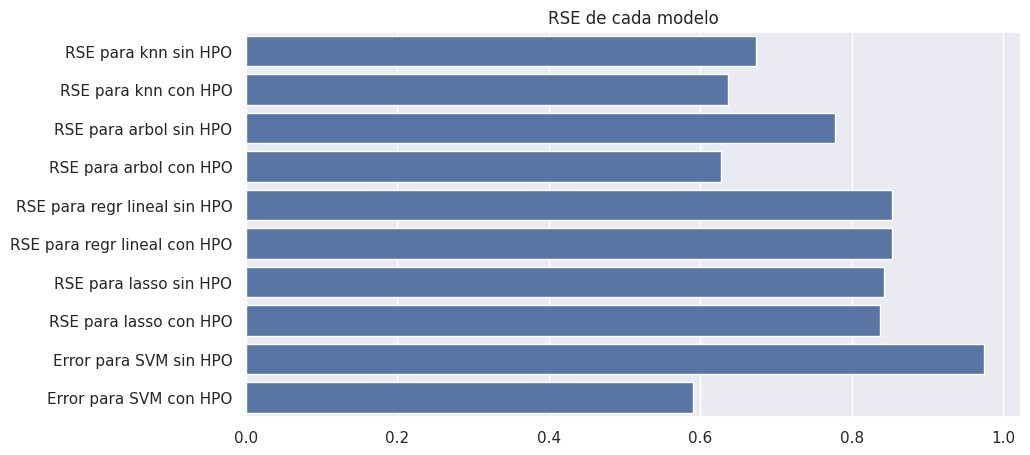

In [40]:
plt.figure(figsize= (10,5))
sns.barplot(data = best_scores_rse, orient='y')
plt.title("RSE de cada modelo")
plt.show()

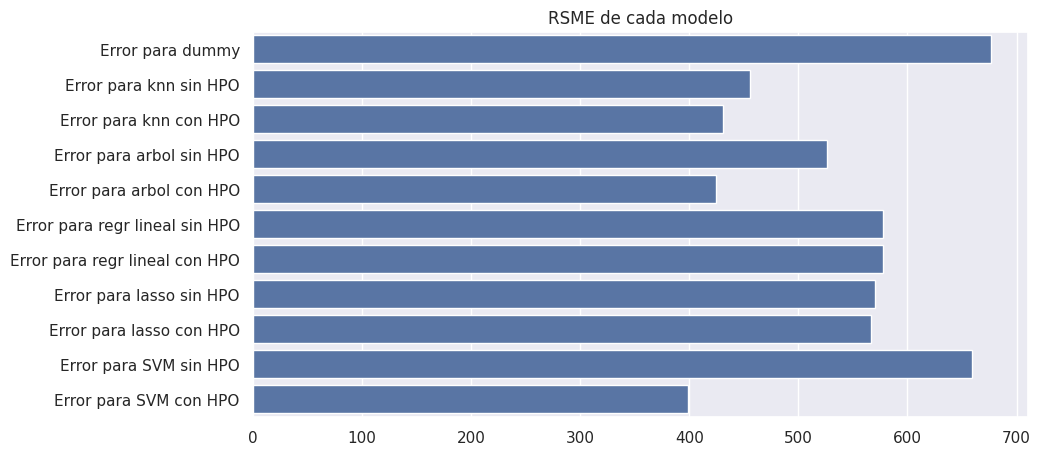

In [41]:
plt.figure(figsize= (10,5))
sns.barplot(data = best_scores, orient='y')
plt.title("RSME de cada modelo")
plt.show()

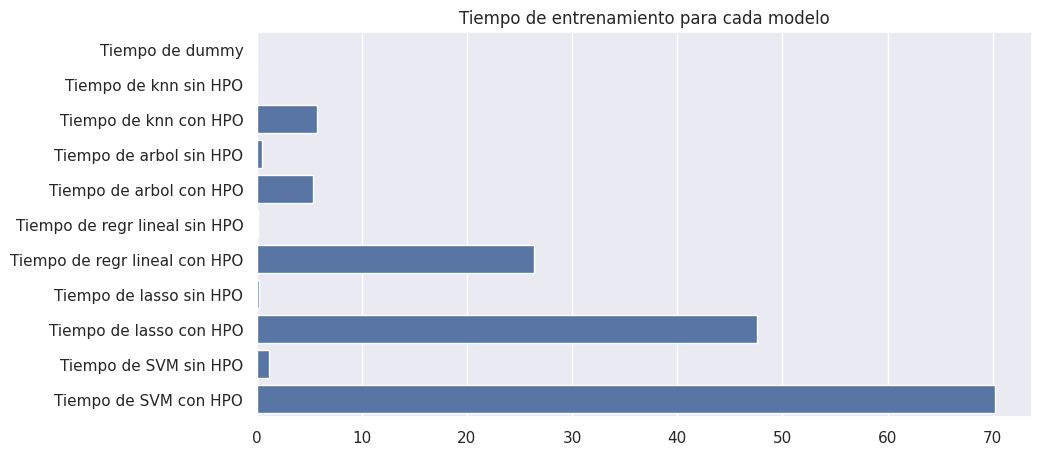

In [54]:
plt.figure(figsize= (10,5))
sns.barplot(data = time_train, orient='y')
plt.title("Tiempo de entrenamiento para cada modelo")
plt.show()

# Pruebas de predicción y modelo final

## Predicción del test

Una vez elegido el modelo se puede realizar la predicción de resultados futuros con los valores de test que se reservaron en el proceso anterior. Así, se realiza una predicción de todo X_test, que incluyen los años 2008 y 2009, y se comparan con los valores reales. 

In [47]:
y_pred=svm_model.predict(X_test)
outer_score =root_mean_squared_error(y_test, y_pred)
print("RMSE de la predicción de y_test:", outer_score)
print("RSE de la predicción de y_test:", outer_score/dummy_value)

RMSE de la predicción de y_test: 381.6434445383763
RSE de la predicción de y_test: 0.5639443360061901


Como se esperaba, los resultados son mejores que los obtenidos en el proceso de elección del modelo, al utilizar más valores. El error en este caso disminuye a un RMSE de 381. 

### Diferencia valores altos y bajos

Después de definir el error total se busca conocer si el modelo es mejor prediciendo valores altos o bajos, para lo cual se realizan diferentes pruebas. En primer lugar, se representan los datos en un gráfico para visualizar el comportamiento de estos con el aumento de sus valores. 

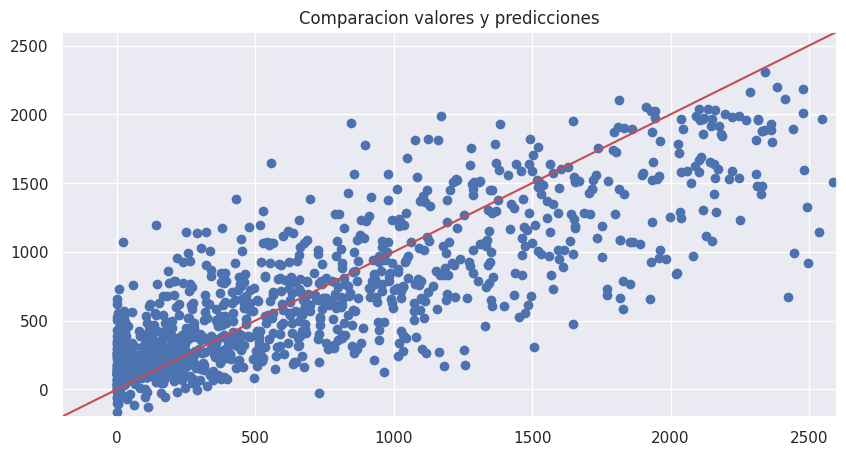

In [53]:
plt.figure(figsize= (10,5))
plt.scatter(y=y_pred,x=y_test)
plt.title("Comparacion valores y predicciones")
y_lim = plt.ylim(bottom = -200, top = 2600)
x_lim = plt.xlim(left = -200, right = 2600)
plt.plot(x_lim, y_lim, color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.show()

En gráfico resulta ser poco claro, porque aunque se observe más dispersión alrededor de los números altos, esto se podría atribuir a la mayor escala que estos tienen por naturaleza. Para comprobar esta teoría, se utilizan dos gráficos *boxplot* que representarán primero los errores absolutos y luego los porcentuales de cada clase. 

In [68]:
y_test_array = y_test['energy'].to_numpy()
columna_error_absoluto = abs(y_pred - y_test_array)
columna_error = abs(y_pred - y_test_array)/(y_test_array)
print(columna_error)

[5.49909446 0.5467876  0.65543249 ... 2.32409782 1.31849724 0.09136154]


In [69]:
altos = []
bajos = []
altos_abs = []
bajos_abs = []
Q1_error = np.quantile(columna_error, 0.25)
Q3_error = np.quantile(columna_error, 0.75)
IQR_error = Q3_error - Q1_error

for i in range(len(y_test)):
    if (y_test_array[i] > np.quantile(train['energy'], 0.75)):
        altos_abs.append(columna_error_absoluto[i])
        if (columna_error[i] < (1.5*IQR_error)):
            altos.append(columna_error[i])
    else:
        bajos_abs.append(columna_error_absoluto[i])
        if (columna_error[i] < (1.5*IQR_error)):
            bajos.append(columna_error[i])
print(altos)
print(bajos)

[0.24007547667386364, 0.16489935095160194, 0.01798224207525832, 0.15190142620518335, 0.19374238126314042, 0.3219269684337772, 0.09839801390418652, 0.2424062806321618, 0.01954139826049442, 0.19312002598145, 0.12475404950558042, 0.08158829917172186, 0.02821578979794574, 0.2250453703167914, 0.09422283138658595, 0.257571638738802, 0.047957363495448435, 0.32089926634021854, 0.15034894868050247, 0.1611079253787891, 0.6971795120837463, 0.20782048577179713, 0.5126327211920615, 0.10447639030655342, 0.27565044290172364, 0.031288248736046756, 0.36426396886720236, 0.1988882952495513, 0.7329907908510754, 0.28987471763745504, 0.317914545875454, 0.04462808522296702, 0.006170801761168268, 0.34054078343289657, 0.184607682373413, 0.060360119503848036, 0.31259797407278656, 0.2254567851051987, 0.1510657762824291, 0.18224704721217694, 0.22815868205199405, 0.14388946189479426, 0.15008150085082073, 0.38655124416931036, 0.5328550172435966, 0.36861818773398697, 0.19556910171870692, 0.1797904386429017, 0.302236

En el caso de los errores porcentuales ha sido necesario eliminar los valores atípicos debido a problemas de escala, ya que sería imposible representarlos de otra manera, ya que al ser un valor porcentual existen algunos datos tan mal predichos de manera proporcional que descolocan toda la distribución. En el caso de los valores absolutos se pueden observar estos valores. 

En las gráficas se muestra en la derecha los resultados para valores altos y en la izquierda aquellos correspondientes a los datos de energía bajos, que resultan dispares entre versiones. 

Text(0.5, 1.0, 'Error porcentual entre predicciones para valores altos y bajos')

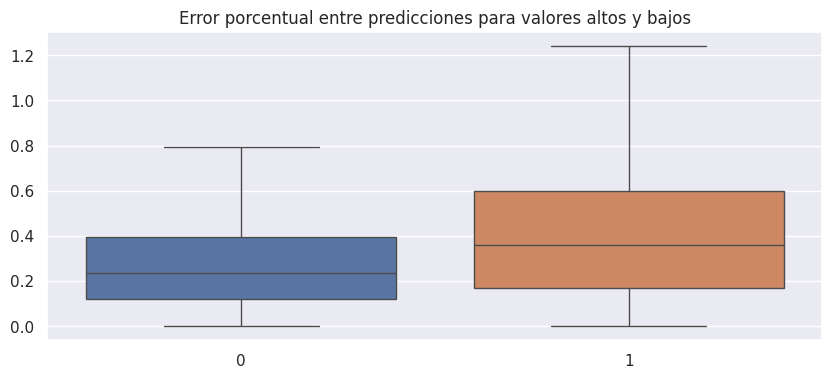

In [63]:
plt.figure(figsize= (10,4))
sns.boxplot([altos, bajos],showfliers=False)
plt.title("Error porcentual entre predicciones para valores altos y bajos")

Text(0.5, 1.0, 'Error absoluto entre predicciones para valores altos y bajos')

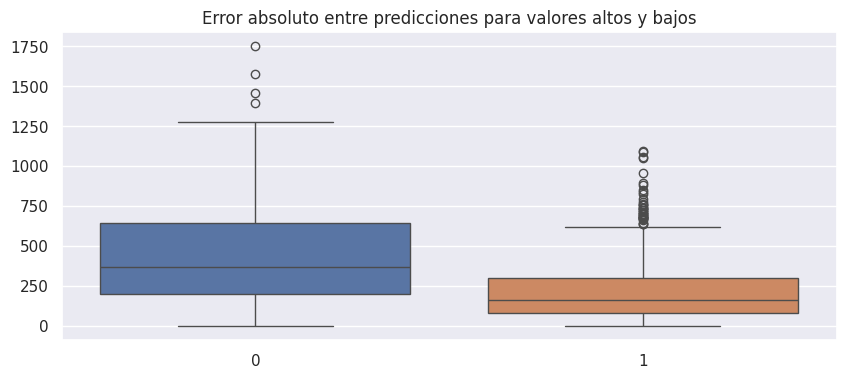

In [72]:
plt.figure(figsize= (10,4))
sns.boxplot([altos_abs, bajos_abs])
plt.title("Error absoluto entre predicciones para valores altos y bajos")

Se puede concluir que el modelo aunque consigue menos error absoluto para valores bajos, esto se debe principalmente a la naturaleza de estos valores como menores en escala. En errores porcentuales los valorea altos suelen tener una predicción ligeramente mejor, aunque con una diferencia poco notable. Esto, además, encaja con lo observado en el primer gráfico y la confusión causada por este. 

## Modelo Final

Para lograr el modelo final se entrena el modelo elegido con todos los datos disponibles del dataset, para conseguir así los mejores resultados posibles al aumentar el número de datos de entrenamiento.

In [44]:
X = data.drop(['datetime', 'energy','hour','day', 'month', 'year'], axis='columns')
y = data[['energy']] 
modelo_final = svm_model.fit(X, np.ravel(y))

Este modelo se almacena en modelo_final.pkl mediante el uso de la librería joblib.

In [45]:
import joblib

joblib.dump(modelo_final,'modelo_final.pkl')

['modelo_final.pkl']